N-Gram Models and their probabilities

A first step in making use of n-gram models is using them to estimate the probabilities of certain events.

In order to make use of these models we will first want to count the words in a document.

In [1]:
import nltk.data
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()


dir_base = "/Users/teacher/repos/f20_ds_nlp/classes/week_2/data"




def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = ""
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_texts += read_file(join(directory, f) )
    return file_texts
    
text_corpus = read_directory_files(dir_base)
print(text_corpus)

Smoke filled the air as multiple fire departments battled a grass fire Monday north of Henry.

A large amount of smoke was reported at about 3:35 p.m., about six miles north of Henry, Morrill Fire Chief Matt Hinman said.

Firefighters from Mitchell, Morrill, Lyman, Torrington, Scottsbluff Rural, Scottsbluff and Gering were called out to respond to the fire. Firefighters from Yoder and Lingle, Wyoming, fire departments, as well as Hot Springs, South Dakota, have also been called to assist. Hinman estimated 50 to 60 firefighters have responded to battle the fire.

“Right now, a wild estimate would be 200-300 acres,” are burning, Hinman said at about 6 p.m., “

One firefighter, Mike Kindred, of Lyman Volunteer Fire, said he had been on the front lines and called the fire “pretty rugged.” He said it is smokey and firefighters can’t see much and are battling the fire on rough, sandy terrain.

The goal, Hingman said, is to “hold the fire lines, hope the winds die down and have the fire conta

So now we have a single text variable that represents all the text in a corpus.

Can we get counts and what not of this?

In [4]:
bigrams = nltk.bigrams(text_corpus)
freq_bi = nltk.FreqDist(bigrams)

In [5]:
for i in bigrams:
    print(i)

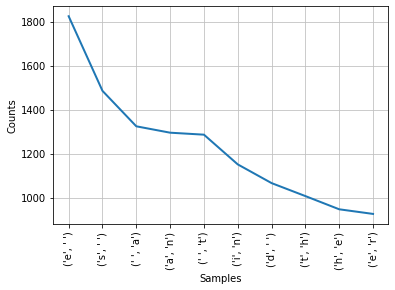

In [6]:
freq_bi.plot(10)

What's the problem with this data?

Characters only.

In [7]:
punkt_sentences = sentence_tokenizer.tokenize(text_corpus)
sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
all_tokens = [word for sentence in sentences_words for word in sentence]
bigrams = nltk.bigrams(all_tokens)
freq_bi = nltk.FreqDist(bigrams)

[(('the', 'Company'), 215), (('’', 's'), 159), (('Company', '’'), 148), (('.', 'The'), 95), (('The', 'Company'), 86), (('of', 'the'), 62), ((',', 'and'), 58), ((',', 'the'), 49), (('in', 'the'), 44), (('to', 'the'), 37), (('on', 'the'), 32), ((',', 'or'), 31), (('and', 'other'), 29), (('subject', 'to'), 29), (('for', 'the'), 27), ((',', 'including'), 26), (('may', 'be'), 26), (('s', 'products'), 23), (('.', 'I'), 23), (('products', 'and'), 22)]


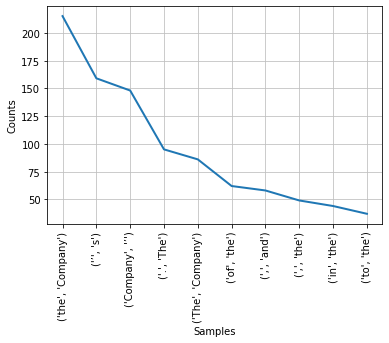

In [8]:
print(freq_bi.most_common(20))
freq_bi.plot(10)

In [9]:
stop_words = nltk.corpus.stopwords.words('english')
content = [w for w in all_tokens if w.lower() not in stop_words]
bigrams = nltk.bigrams(content)
freq_bi = nltk.FreqDist(bigrams)

[(('Company', '’'), 148), (('.', 'Company'), 94), ((',', 'Company'), 41), ((',', 'including'), 26), (('’', 'products'), 24), ((',', 'could'), 18), (('operating', 'results'), 17), (('products', ','), 17), (('financial', 'condition'), 16), (('’', 'business'), 14), (('materially', 'adversely'), 14), (('products', 'services'), 14), (('condition', 'operating'), 13), (('laws', 'regulations'), 13), (('could', 'materially'), 12), (('adversely', 'affect'), 12), (('Company', 'also'), 12), (('affect', 'Company'), 11), (('Form', '10-Q'), 11), (('Company', 'may'), 11)]


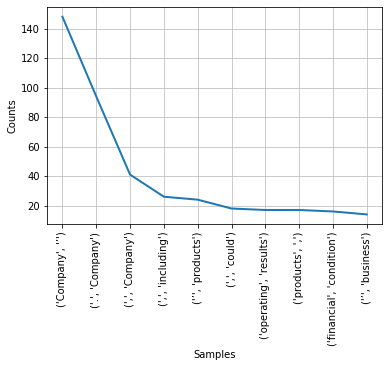

In [10]:
print(freq_bi.most_common(20))
freq_bi.plot(10)

What other things might we remove?

Numbers? Punctuation?

In [12]:
print(freq_bi.hapaxes())
print(freq_bi.N())
print(freq_bi.freq((',','Company')))

[(',', 'Hingman'), ('Hingman', 'said'), ('per', 'hour.Today'), ('hour.Today', '#'), ('#', 'NASDAQ'), ('NASDAQ', 'bell'), ('bell', 'rang'), ('rang', '“'), ('“', 'Tronc'), ('Tronc', ','), (',', 'Tronc'), ('Tronc', '!'), ('”', '#'), ('#', 'transformationItem'), ('transformationItem', '1A'), ('1A', '.'), ('.', 'Risk'), ('Risk', 'Factors'), ('Factors', 'following'), ('following', 'description'), ('description', 'risk'), ('factors', 'includes'), ('includes', 'material'), ('material', 'changes'), (',', 'supersedes'), ('supersedes', 'description'), ('description', ','), ('factors', 'associated'), ('business', 'previously'), ('previously', 'disclosed'), ('disclosed', 'Part'), ('Item', '1A'), ('1A', '2017'), ('2017', 'Form'), ('Form', '10-K'), ('10-K', 'heading'), ('heading', '“'), ('“', 'Risk'), ('Risk', 'Factors.'), ('Factors.', '”'), ('”', 'business'), ('results', 'Company'), ('Company', 'affected'), ('whether', 'currently'), ('currently', 'known'), ('known', 'unknown'), ('unknown', ','), ('i

In [14]:
MLE_Dist = nltk.MLEProbDist(freq_bi)
MLE_Dist.max()
print(MLE_Dist.prob(('products', 'services')))
print(MLE_Dist.logprob(('Air', 'Force')) )

0.001828870019595036
-1e+300


But what if we use words that we've never seen before?

In [15]:
print(MLE_Dist.prob(('Chair', 'Force')))
print(MLE_Dist.logprob(('Chair', 'Force')) )

0.0
-1e+300


In [20]:
Smoothed_dist = nltk.LaplaceProbDist(freq_bi)
print(Smoothed_dist.prob(('Chairss', 'Forces')))
print(Smoothed_dist.logprob(('Chair', 'Force')) )

7.966223213574445e-05
-13.615744569853312


In [21]:
print(Smoothed_dist.generate())

('increasing', 'cost')


In [22]:
test_sentence_1 = "The quantity decrease of the production units and the removal of funds occurred because the decided to use procurement funds to develop a higher priority air superiority program."
test_sentence_2 = "It is like totally rad that we were able to go out and see a bus with all the new doors on it."

def get_sentence_bigrams(sentence):
    sentence_words = treebank_tokenizer.tokenize(sentence)
    word_count = len(sentence_words)
    bigrams = nltk.bigrams(sentence_words)
    return bigrams, word_count
    
def estimate_sentence_probability(bigram_sentence, word_length):
    slogprob = 0
    for bigram_words in bigram_sentence:
        logprob= Smoothed_dist.logprob(bigram_words)
        slogprob += logprob
     
    return slogprob/word_length


bigram_sentence,word_count = get_sentence_bigrams(test_sentence_1)
estimate_probability = estimate_sentence_probability(bigram_sentence, word_count)
print(estimate_probability)

bigram_sentence_2,word_count = get_sentence_bigrams(test_sentence_2)
estimate_probability_2 = estimate_sentence_probability(bigram_sentence_2, word_count)
print(estimate_probability_2)



-13.146236136410092
-13.048421879442758


Do these numbers look right?

In [27]:
def get_better_sentence_bigrams(sentence):
    sentence_words = treebank_tokenizer.tokenize(sentence)
    print(sentence_words)
    stop_words = nltk.corpus.stopwords.words('english')
    content = [w for w in sentence_words if w.lower() not in stop_words]
    word_count = len(sentence_words)
    bigrams = nltk.bigrams(content)
    print(list(bigrams))
    return bigrams, word_count
    

bigram_sentence, word_count = get_better_sentence_bigrams(test_sentence_1)
estimate_probability = estimate_sentence_probability(bigram_sentence, word_count)
print(estimate_probability)

bigram_sentence, word_count = get_better_sentence_bigrams(test_sentence_2)
estimate_probability = estimate_sentence_probability(bigram_sentence, word_count)
print(estimate_probability)

['The', 'quantity', 'decrease', 'of', 'the', 'production', 'units', 'and', 'the', 'removal', 'of', 'funds', 'occurred', 'because', 'the', 'decided', 'to', 'use', 'procurement', 'funds', 'to', 'develop', 'a', 'higher', 'priority', 'air', 'superiority', 'program', '.']
[('quantity', 'decrease'), ('decrease', 'production'), ('production', 'units'), ('units', 'removal'), ('removal', 'funds'), ('funds', 'occurred'), ('occurred', 'decided'), ('decided', 'use'), ('use', 'procurement'), ('procurement', 'funds'), ('funds', 'develop'), ('develop', 'higher'), ('higher', 'priority'), ('priority', 'air'), ('air', 'superiority'), ('superiority', 'program'), ('program', '.')]
0.0
['It', 'is', 'like', 'totally', 'rad', 'that', 'we', 'were', 'able', 'to', 'go', 'out', 'and', 'see', 'a', 'bus', 'with', 'all', 'the', 'new', 'doors', 'on', 'it', '.']
[('like', 'totally'), ('totally', 'rad'), ('rad', 'able'), ('able', 'go'), ('go', 'see'), ('see', 'bus'), ('bus', 'new'), ('new', 'doors'), ('doors', '.')]
0

In [25]:
print(list(bigram_sentence))

[]


In [ ]:
print(sentence)